<a href="https://colab.research.google.com/github/alissaqs/DataScience/blob/main/Pandas_diferentes_formatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando os nomes

In [ ]:
import pandas as pd

In [ ]:
nomes_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')

In [ ]:
nomes_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')

In [ ]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
50,RAFAELA,0,272718,51,F
156,YASMIN,0,103787,157,F
102,MARILENE,0,163944,103,F
142,RAISSA,0,113146,143,F
176,MARA,0,88631,177,F


In [ ]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
78,WILSON,0,188329,79,M
177,CLAUDINEI,0,74264,178,M
38,DIEGO,0,421973,39,M
19,RODRIGO,0,598825,20,M
121,ADEMIR,0,122923,122,M


In [ ]:
print('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [ ]:
frames = [nomes_f, nomes_m]

In [ ]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
195,WALTER
196,ARLINDO
197,MICHAEL
198,ALVARO


# Incluindo ID dos alunos


In [ ]:
import numpy as np
np.random.seed(123)

In [ ]:
total_alunos = len(nomes)
total_alunos

400

In [ ]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [ ]:
nomes.head()

,nome,id_aluno
0,MARIA,235
1,ANA,43
2,FRANCISCA,304
3,ANTONIA,156
4,ADRIANA,343


In [ ]:
dominios = ['@dominiodoemmail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [ ]:
nomes

,nome,id_aluno,dominio
0,MARIA,235,@dominiodoemmail.com.br
1,ANA,43,@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com
4,ADRIANA,343,@servicodoemail.com
...,...,...,...
195,WALTER,231,@dominiodoemmail.com.br
196,ARLINDO,99,@servicodoemail.com
197,MICHAEL,323,@dominiodoemmail.com.br
198,ALVARO,383,@servicodoemail.com


In [ ]:
 nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()
#  Agora queremos juntar os nomes aos seus respectivos domínios, formando os endereços de e-mail. Para isso, criaremos a coluna nomes['email'] que receberá a concatenação de nomes.nome com nomes.dominio. Como queremos concatenar strings, usaremos a função str.cat(). Além disso, desejamos que os nomes estejam em caixa baixa (letras minúsculas), o que conseguiremos com str.lower().

In [ ]:
nomes

,nome,id_aluno,dominio,email
0,MARIA,235,@dominiodoemmail.com.br,maria@dominiodoemmail.com.br
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com
...,...,...,...,...
195,WALTER,231,@dominiodoemmail.com.br,walter@dominiodoemmail.com.br
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com
197,MICHAEL,323,@dominiodoemmail.com.br,michael@dominiodoemmail.com.br
198,ALVARO,383,@servicodoemail.com,alvaro@servicodoemail.com


# Criando a tabela Cursos

In [ ]:
!pip3 install html5lib
!pip3 install lxml

In [ ]:
import html5lib

In [ ]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [ ]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [ ]:
type(cursos)

list

In [ ]:
cursos = cursos[0]

In [ ]:
type(cursos)

pandas.core.frame.DataFrame

In [ ]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


# Alterando o index de cursos

In [ ]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [ ]:
cursos['id'] = cursos.index + 1
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


# Matriculando os alunos nos cursos

In [ ]:
nomes.head()

,nome,id_aluno,dominio,email
0,MARIA,235,@dominiodoemmail.com.br,maria@dominiodoemmail.com.br
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com


In [ ]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [ ]:
nomes.head()

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemmail.com.br,maria@dominiodoemmail.com.br,3
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,1
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,1
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com,3
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1


In [ ]:
nomes.matriculas.describe() # média 2 cursos por pessoa

count    400.000000
mean       2.137500
std        1.511392
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


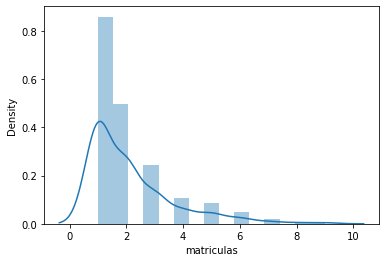

In [ ]:
sns.distplot(nomes.matriculas)

In [ ]:
nomes.matriculas.value_counts()

1    183
2    106
3     52
4     23
5     18
6     10
7      4
8      2
9      2
Name: matriculas, dtype: int64

# Selecionando Cursos

In [ ]:
nomes.head()

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemmail.com.br,maria@dominiodoemmail.com.br,3
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,1
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,1
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com,3
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1


In [ ]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [ ]:
for index, row in nomes.iterrows(): #devolve cada linha do conjunto
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas): #buscará cada elemento (i) no range(matriculas) (de 0 até o valor de matriculas)
    matr = (id, np.random.choice(cursos.index, p = prob))
    todas_matriculas.append(matr)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])


In [ ]:
matriculas.head()

,id_aluno,id_curso
0,235,10
1,235,10
2,235,1
3,43,12
4,304,9


In [ ]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [ ]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
0,8,Lógica de programação
1,81,Java para Web
2,18,C# para Web
3,17,Ruby on Rails
4,24,Cursos de Python


In [ ]:
cursos = cursos.set_index('id')
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


## Saída em diferentes formatos

In [ ]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [ ]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,8,Lógica de programação
1,81,Java para Web
2,18,C# para Web
3,17,Ruby on Rails
4,24,Cursos de Python
5,68,PHP com MySql
6,4,.NET para web
7,54,Novas integrações com Java
8,68,TDD com Java
9,48,Código limpo com C#


In [ ]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_de_alunos":{"0":8,"1":81,"2":18,"3":17,"4":24,"5":68,"6":4,"7":54,"8":68,"9":48,"10":57,"11":12,"12":45,"13":46,"14":26,"15":71,"16":37,"17":79,"18":59,"19":33},"nome_do_curso":{"0":"L\\u00f3gica de programa\\u00e7\\u00e3o","1":"Java para Web","2":"C# para Web","3":"Ruby on Rails","4":"Cursos de Python","5":"PHP com MySql","6":".NET para web","7":"Novas integra\\u00e7\\u00f5es com Java","8":"TDD com Java","9":"C\\u00f3digo limpo com C#","10":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","11":"Hardware b\\u00e1sico","12":"Persist\\u00eancia com .NET","13":"Desenvolvendo jogos","14":"An\\u00e1lise de dados","15":"Estat\\u00edstica b\\u00e1sica","16":"Internet das coisas","17":"Programa\\u00e7\\u00e3o funcional","18":"Boas pr\\u00e1ticas em Java","19":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [ ]:
matriculas_html = matriculas_por_curso.to_html()
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>8</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>81</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>18</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>17</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>24</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>68</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>4</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>54</td>\n      <td>Novas integrações com Java</td>\n  

In [ ]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>8</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>1</th>
      <td>81</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>2</th>
      <td>18</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>17</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>4</th>
      <td>24</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>5</th>
      <td>68</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>6</th>
      <td>4</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>7</th>
      <td>54</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>8</th>
      <td>68</td>
  

# Criando o banco SQL

In [ ]:
!pip3 install sqlalchemy

In [ ]:
from sqlalchemy import create_engine, MetaData, Table, inspect

In [ ]:
engine = create_engine('sqlite:///:memory:')

In [ ]:
type(engine)

sqlalchemy.engine.base.Engine

In [ ]:
matriculas_por_curso.to_sql('matriculas', engine)

In [ ]:
inspector = inspect(engine)

In [ ]:
print(inspector.get_table_names())

['matriculas']


# Buscando no banco SQL

In [ ]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [ ]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,0,8,Lógica de programação
1,2,18,C# para Web
2,3,17,Ruby on Rails
3,6,4,.NET para web
4,11,12,Hardware básico


In [ ]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,8
1,Java para Web,81
2,C# para Web,18
3,Ruby on Rails,17
4,Cursos de Python,24
5,PHP com MySql,68
6,.NET para web,4
7,Novas integrações com Java,54
8,TDD com Java,68
9,Código limpo com C#,48


In [ ]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [ ]:
muitas_matriculas.query('quantidade_de_alunos > 60')

,nome_do_curso,quantidade_de_alunos
1,Java para Web,81
5,PHP com MySql,68
8,TDD com Java,68
15,Estatística básica,71
17,Programação funcional,79


In [ ]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
1,Java para Web,81


# Escrevendo no banco

In [ ]:
print(engine.table_names())

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


In [ ]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

# Nomes dos alunos e alunas da próxima turma

In [ ]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
0,8,Lógica de programação
1,81,Java para Web
2,18,C# para Web
3,17,Ruby on Rails
4,24,Cursos de Python
5,68,PHP com MySql
6,4,.NET para web
7,54,Novas integrações com Java
8,68,TDD com Java


In [ ]:
matriculas.head()

,id_aluno,id_curso
0,235,10
1,235,10
2,235,1
3,43,12
4,304,9


In [ ]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma.head()

,id_aluno,id_curso
26,217,16
42,42,16
94,37,16
149,246,16
190,213,16


In [ ]:
nomes.head()

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemmail.com.br,maria@dominiodoemmail.com.br,3
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,1
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,1
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com,3
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

In [ ]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [ ]:
proxima_turma

In [ ]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [ ]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [ ]:
proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'.format(nome_curso)})

,Alunos do curso de Estatística básica
id_aluno,
2,CESAR
37,ANDREIA
42,VANESSA
54,MARGARIDA
59,FABRICIO
62,EUNICE
71,OSMAR
86,GUSTAVO
109,KELLY


In [ ]:
proxima_turma = proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'.format(nome_curso)})

# Excel

In [ ]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [ ]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,CESAR
1,ANDREIA
2,VANESSA
3,MARGARIDA
4,FABRICIO
5,EUNICE
6,OSMAR
7,GUSTAVO
8,KELLY
9,ANDERSON
